# WELCOME!

# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Split Data as Train and Test set
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
!pip install pyforest

In [2]:
!pip install pandas_profiling
!pip install squarify
!pip install termcolor
!pip install pyclustertend

In [5]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.5 MB/s eta 0:00:00


### Importing Modules

In [6]:
# Data and Stats packages
import numpy as np
import pandas as pd

import re
import string

# ML Model packages

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["axes.grid"] = False
import squarify as sq
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [7]:
df0 = pd.read_csv('HR_Dataset.csv')
df = df0.copy()
df.head() 

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.shape

(14999, 10)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

3008

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(11991, 10)

In [14]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [15]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [16]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [17]:
df.columns = df.columns.str.lower().str.strip()

In [18]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

In [19]:
!pip install colorama

In [20]:
import colorama
from colorama import *

In [22]:
%matplotlib inline

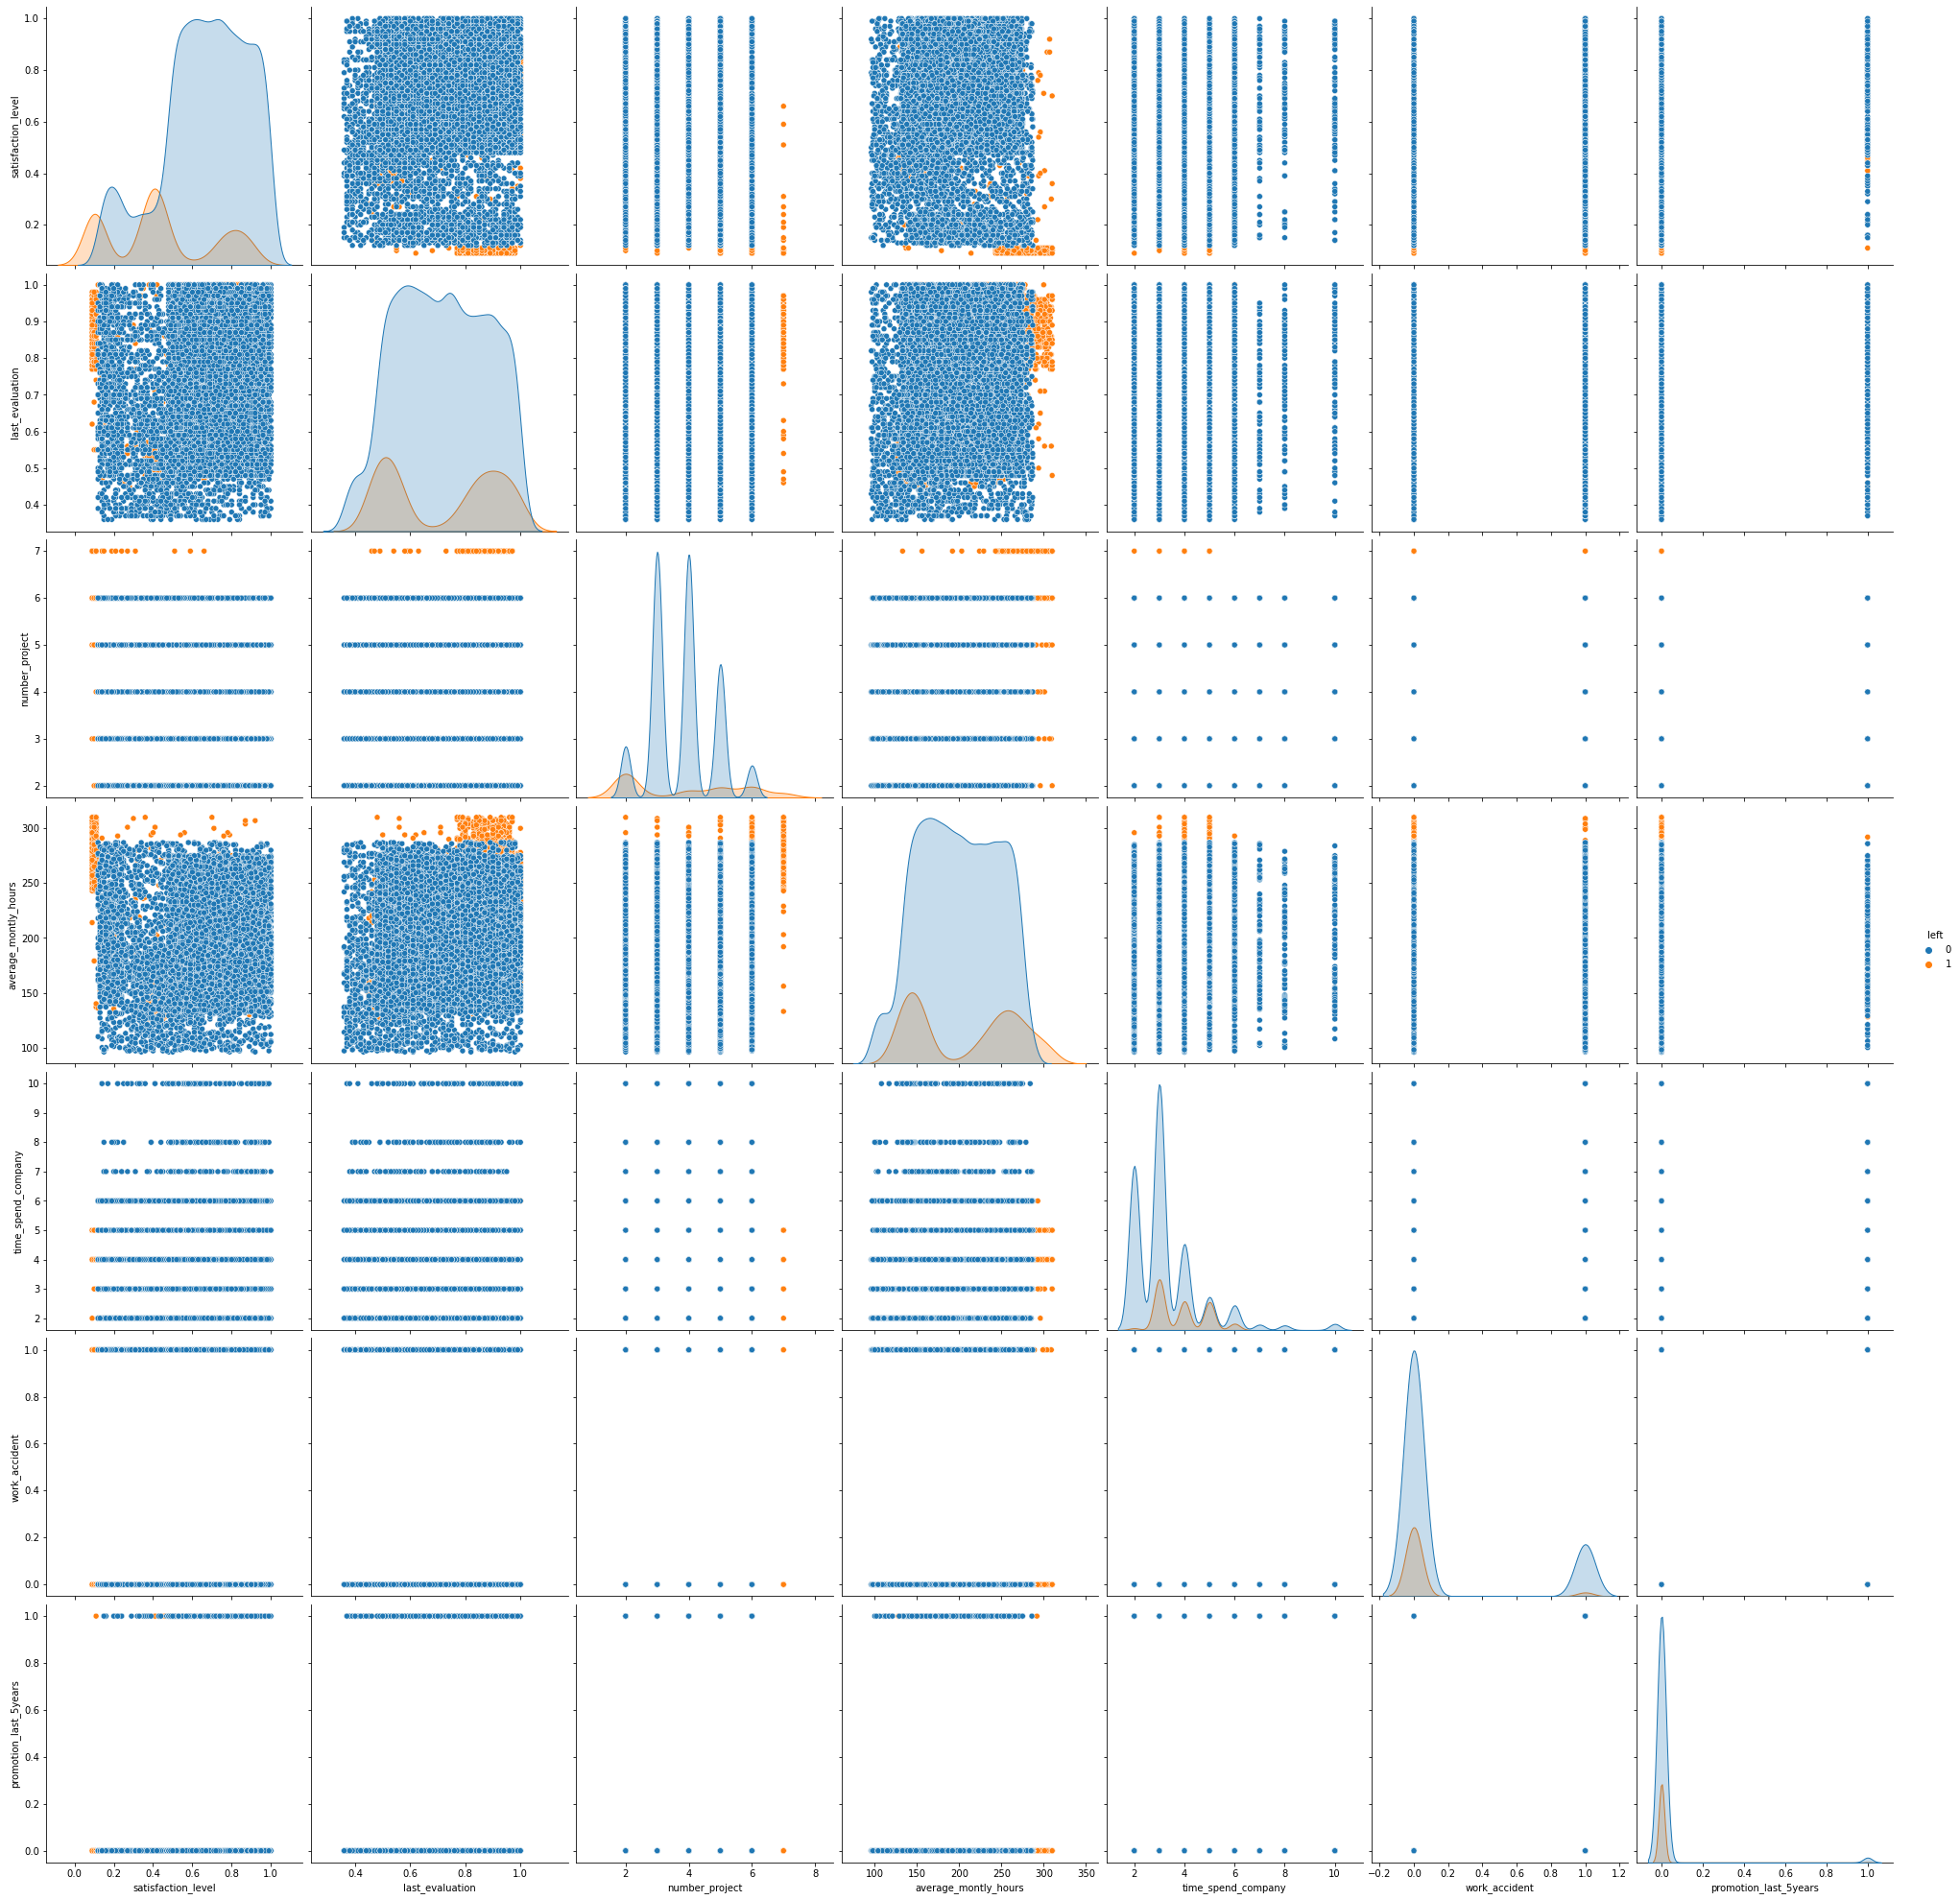

In [21]:
sns.pairplot(data=df, hue="left", height=4, aspect =1)

<AxesSubplot:>

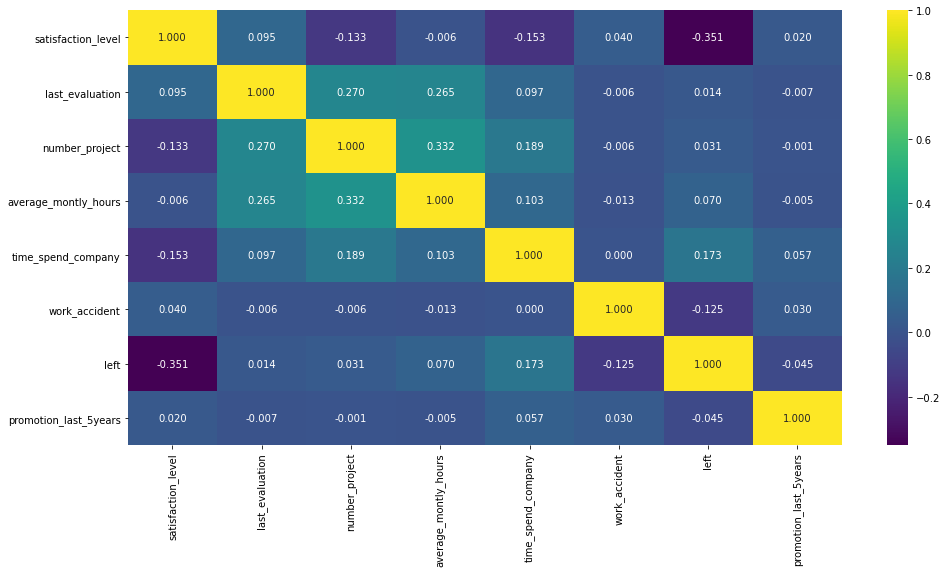

In [23]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.3f')

<AxesSubplot:>

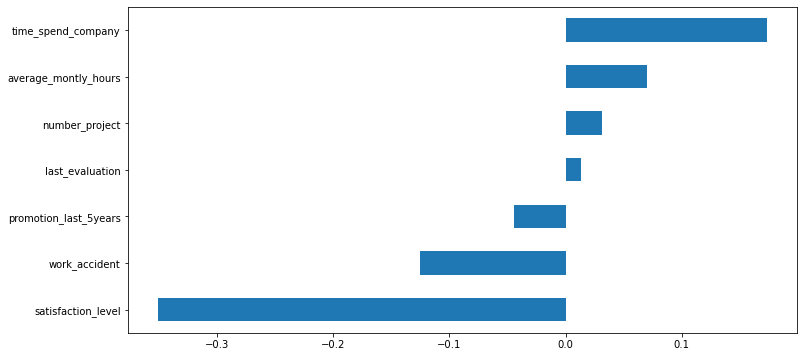

In [24]:
plt.figure(figsize=(12, 6))
df.corr()['left'].drop('left').sort_values().plot.barh()

In [26]:
# Checking correlation
df.corr()[(df.corr()>=0.9) & (df.corr()<1)].any().any(), df.corr()[(df.corr()<=-0.9) & (df.corr()>-1)].any().any()

(False, False)

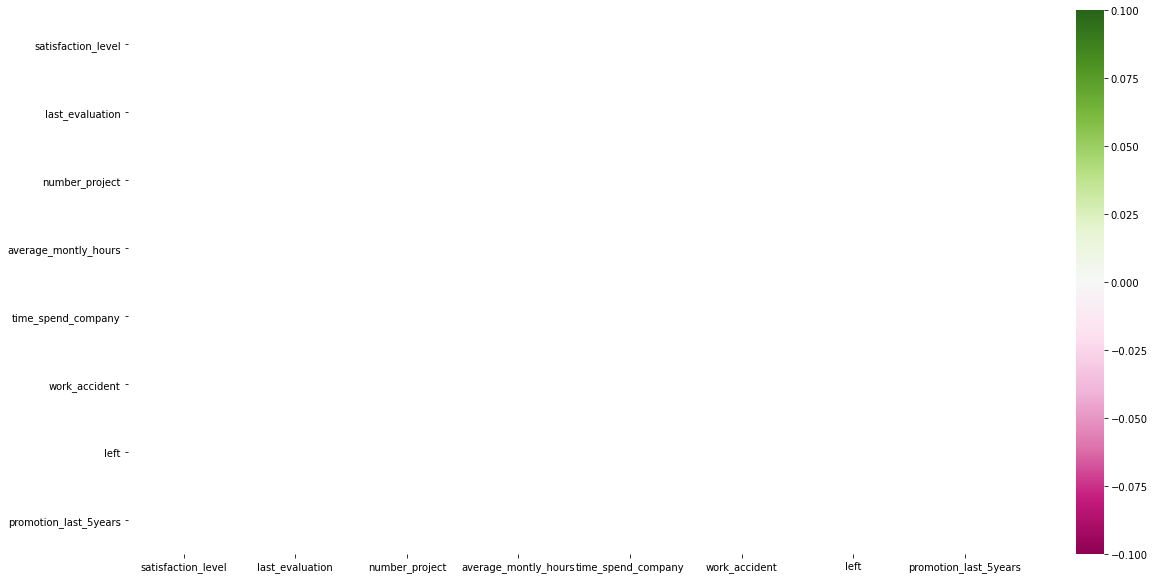

In [27]:
df_temp = df.corr()
filteredDf = df_temp[((df_temp >= .9) | (df_temp <= -.9)) & (df_temp !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf,cmap="PiYG")  #, annot=True
plt.show()

In [28]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in df.iloc[:, [0,1,3]].columns:
    
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_lim = df[col].quantile(0.25) - factor*IQR
        upper_lim = df[col].quantile(0.75) + factor*IQR
    
        cond = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        if cond > 0 and factor == 2:
            list2.append(df[(df[col] < lower_lim) | (df[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------

TOTAL OUTLIERS FOR 1.5 IQR : 0

Outliers for 2 IQR :
-------------------------------------

TOTAL OUTLIERS FOR 2 IQR : 0



### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [29]:
df.groupby('left')['left'].count()/11991

left
0    0.833959
1    0.166041
Name: left, dtype: float64

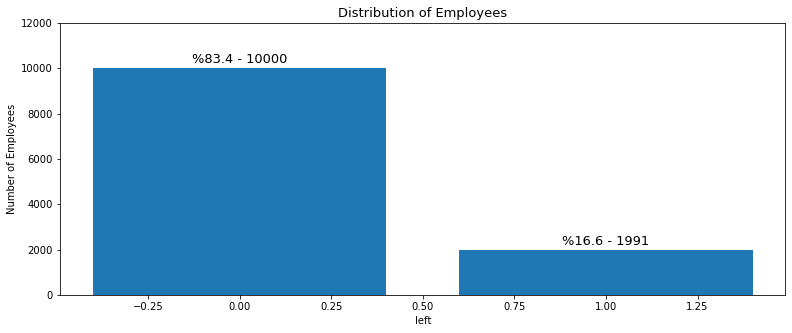

In [30]:
plt.figure(figsize=(13,5))

x = df['left'].value_counts().index
y = df['left'].value_counts().values

plt.bar(x,y,label='left')

plt.ylim(0,12000)
plt.xlabel('left'), plt.ylabel('Number of Employees') 
plt.title('Distribution of Employees', size=13)

for i in range(len(x)):
    plt.text(x[i], y[i]+100, f'%{round((y[i]/y.sum())*100,2)} - {str(y[i])}', ha='center', va='bottom', size=13)

(0.0, 100.0)

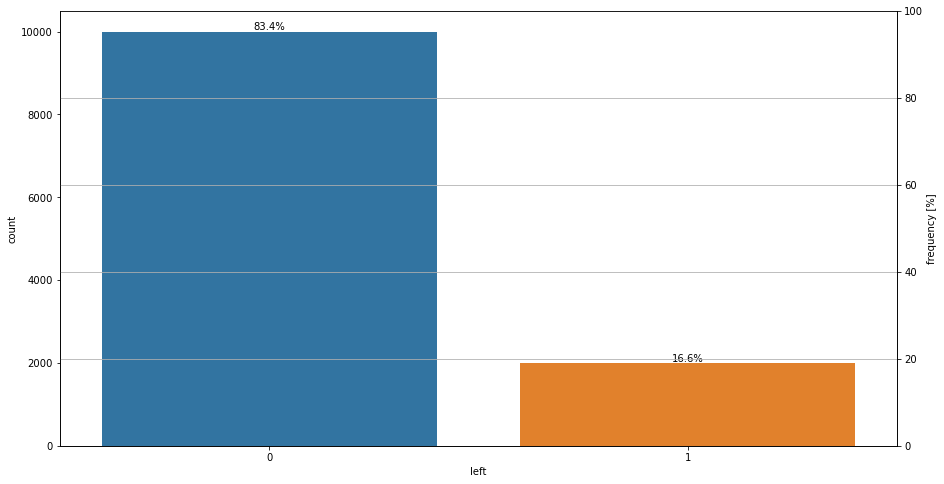

In [31]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

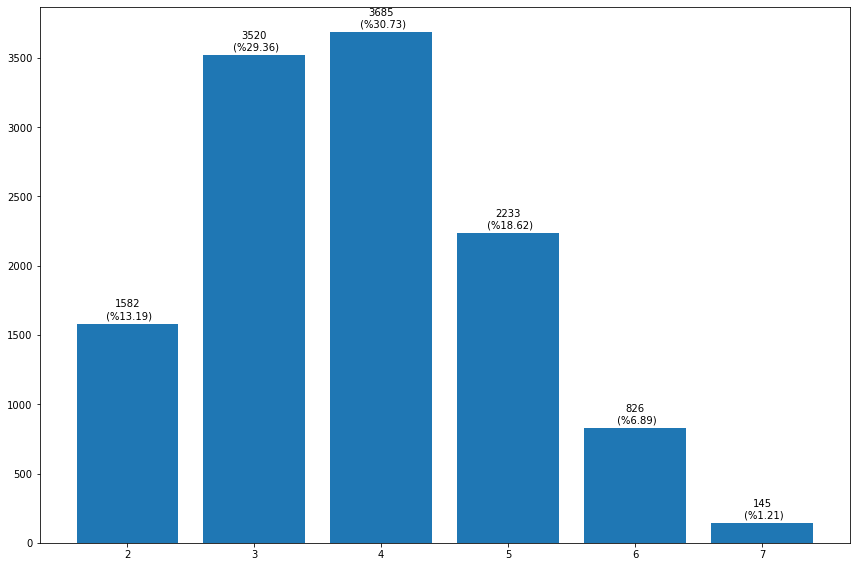

In [32]:
plt.figure(figsize=(12,8))

x = df['number_project'].value_counts().index
y = df['number_project'].value_counts().values

plt.bar(x,y,label='number_project')

for i in range(len(x)):
    plt.text(x[i], y[i]+100, f'{str(y[i])}\n (%{round((y[i]/y.sum())*100,2)})', ha='center', va='center', size=10)
    
plt.tight_layout();

(0.0, 100.0)

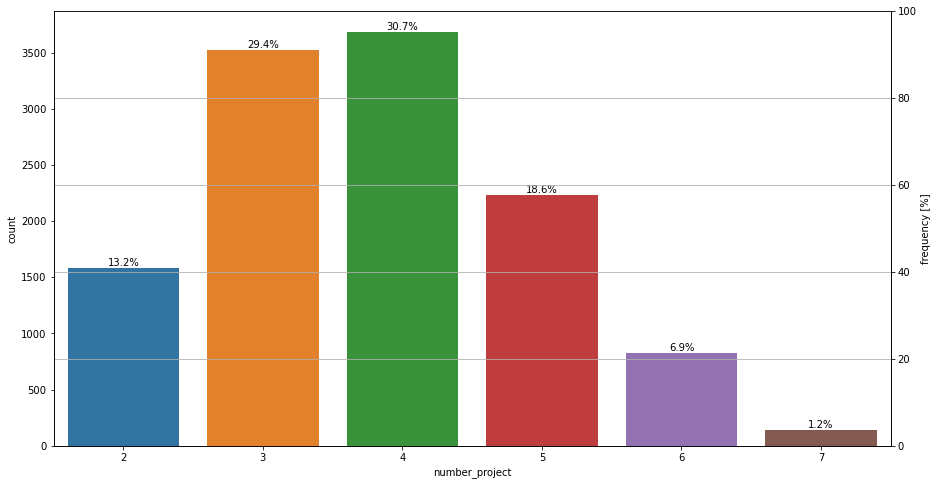

In [33]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='number_project')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


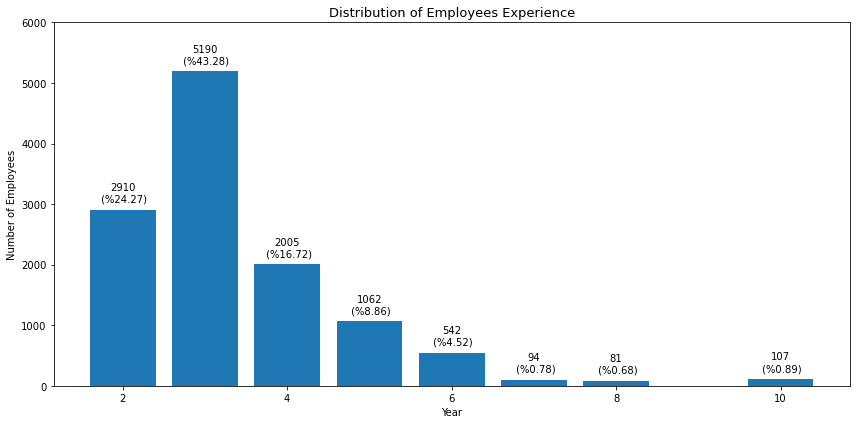

In [34]:
plt.figure(figsize=(12,6))

x = df['time_spend_company'].value_counts().index
y = df['time_spend_company'].value_counts().values

plt.bar(x,y,label='time_spend_company')

for i in range(len(x)):
    plt.text(x[i], y[i]+100, f'{str(y[i])}\n (%{round((y[i]/y.sum())*100,2)})', ha='center', va='bottom', size=10)
    
plt.ylim(0,6000)
plt.xlabel('Year') 
plt.ylabel('Number of Employees') 
plt.title('Distribution of Employees Experience', size=13)

plt.tight_layout();

(0.0, 100.0)

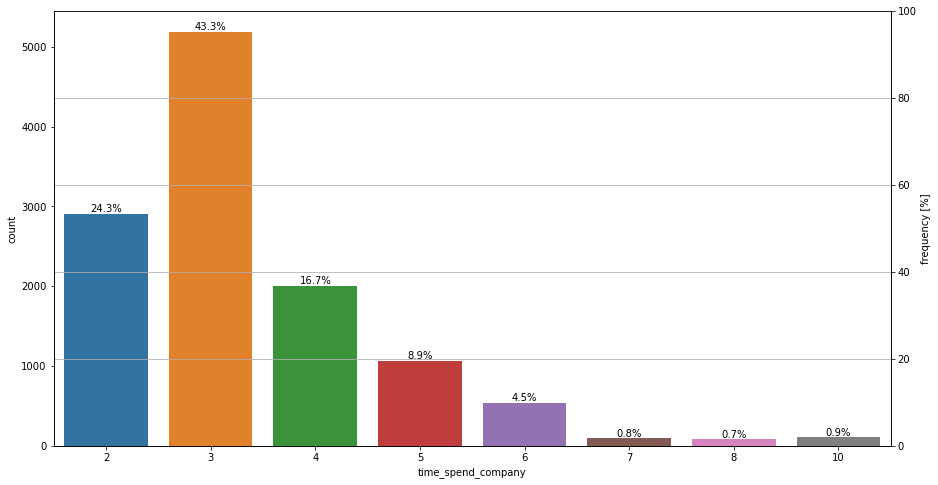

In [35]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='time_spend_company')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

### Subplots of Features

You can use the methods of the matplotlib.

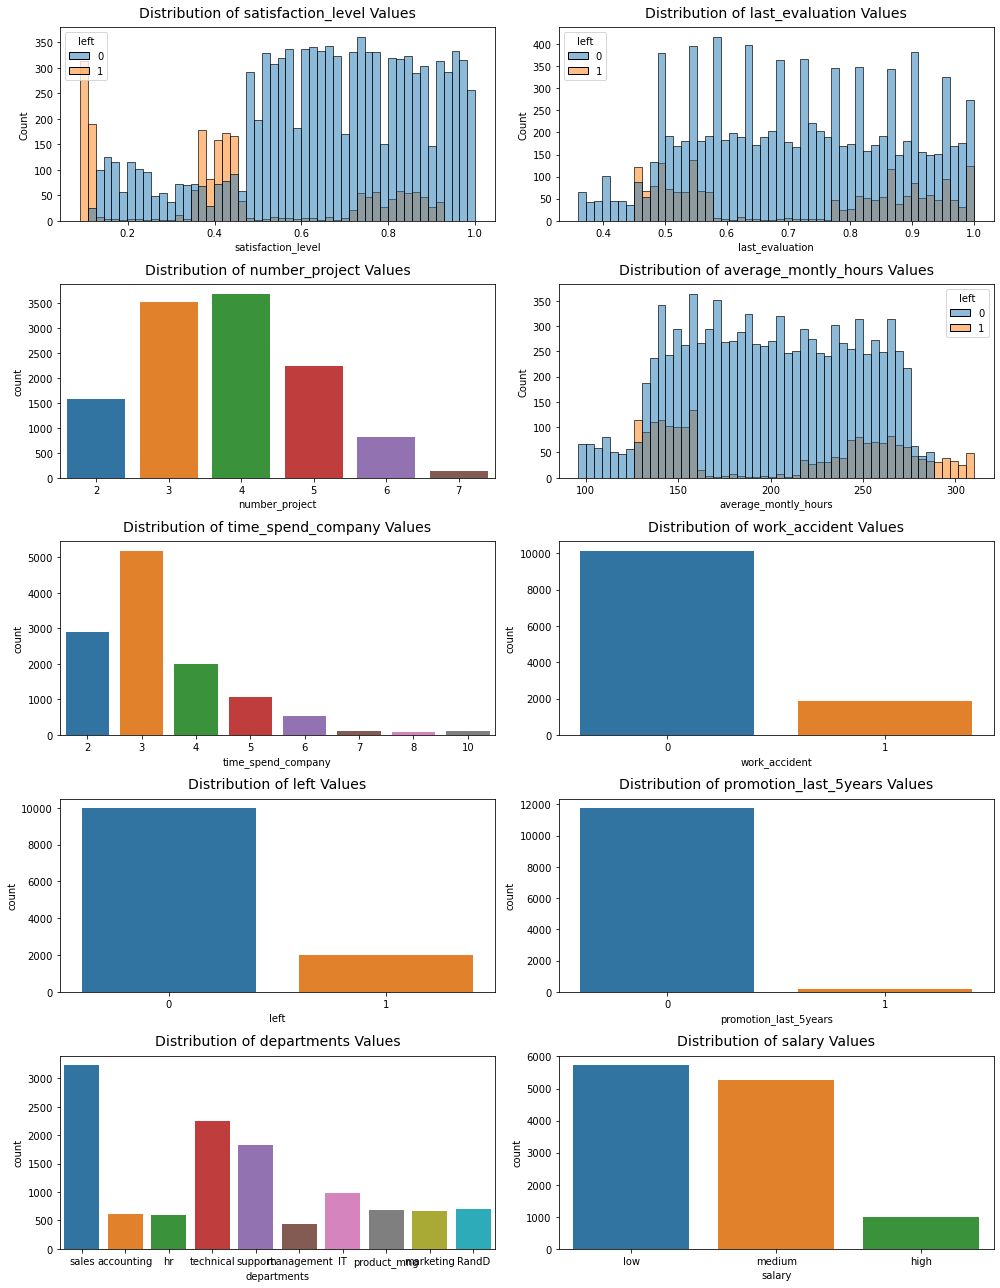

In [36]:
plt.figure(figsize=(14,18))

index = 0

col1 = ['satisfaction_level','last_evaluation','average_montly_hours']
col2 = ['number_project','time_spend_company','work_accident','promotion_last_5years','departments','salary','left']

for col in df.columns:
    if col in col1:
        index += 1
        plt.subplot(5,2,index)
        sns.histplot(data=df, x=col, bins=50, hue='left')
        plt.title(f'Distribution of {col} Values', fontsize=14, pad=10)
    else:
        index += 1
        plt.subplot(5,2,index)        
        a = sns.countplot(data=df, x=col)
        #a.set_xticklabels(a.containers[0], fontsize=11), plt.ylim(0, df[col].value_counts().max()+1000)
        plt.title(f'Distribution of {col} Values', fontsize=14, pad=10)
        
plt.tight_layout()

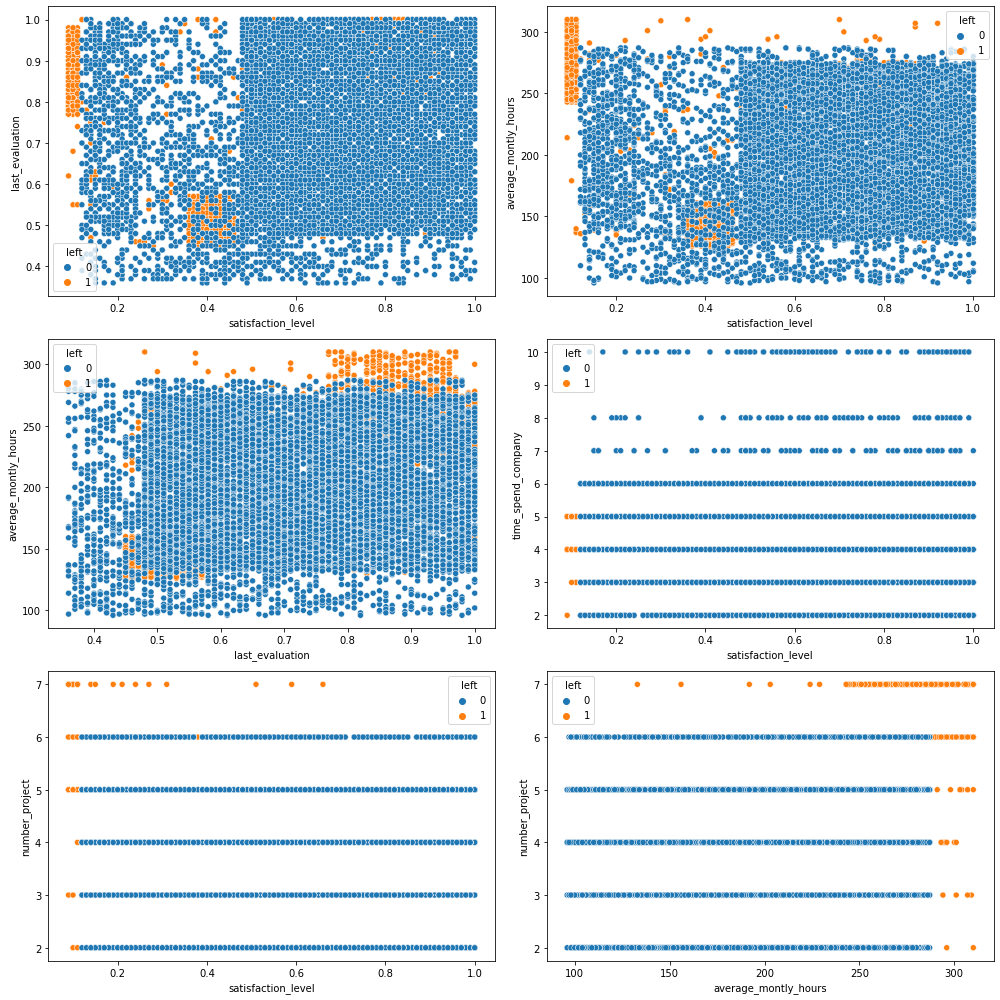

In [37]:
fig, ax = plt.subplots(3,2, figsize=(14,14))

sns.scatterplot(x='satisfaction_level', y='last_evaluation', data=df, hue='left', ax=ax[0][0])
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=df, hue='left', ax=ax[0][1])
sns.scatterplot(x='last_evaluation', y='average_montly_hours', data=df, hue='left', ax=ax[1][0])
sns.scatterplot(x='satisfaction_level', y='time_spend_company', data=df, hue='left', ax=ax[1][1])
sns.scatterplot(x='satisfaction_level', y='number_project', data=df, hue='left', ax=ax[2][0])
sns.scatterplot(x='average_montly_hours', y='number_project', data=df, hue='left', ax=ax[2][1])

fig.tight_layout();

### The Effect of Promotion Status

(0.0, 100.0)

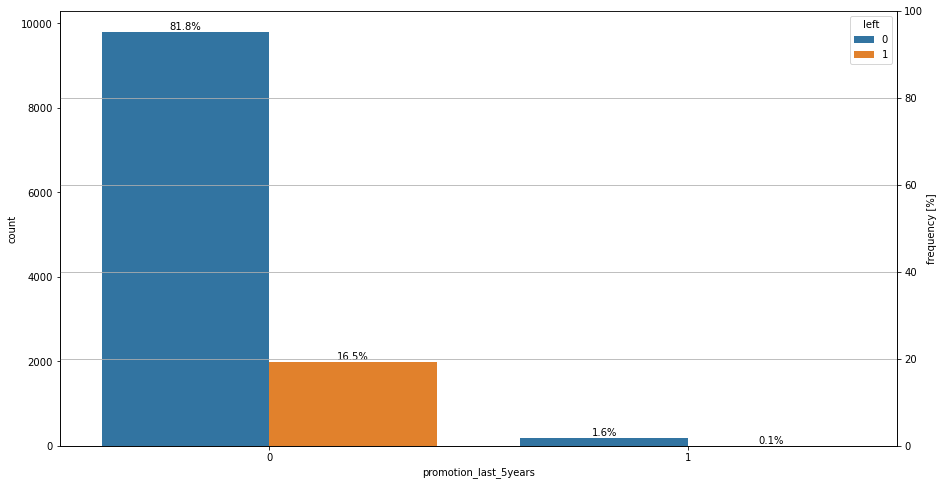

In [38]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='promotion_last_5years', hue='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')
fig2.grid(None)
fig2.set_ylim(0,100)

### The effect of experience

(0.0, 100.0)

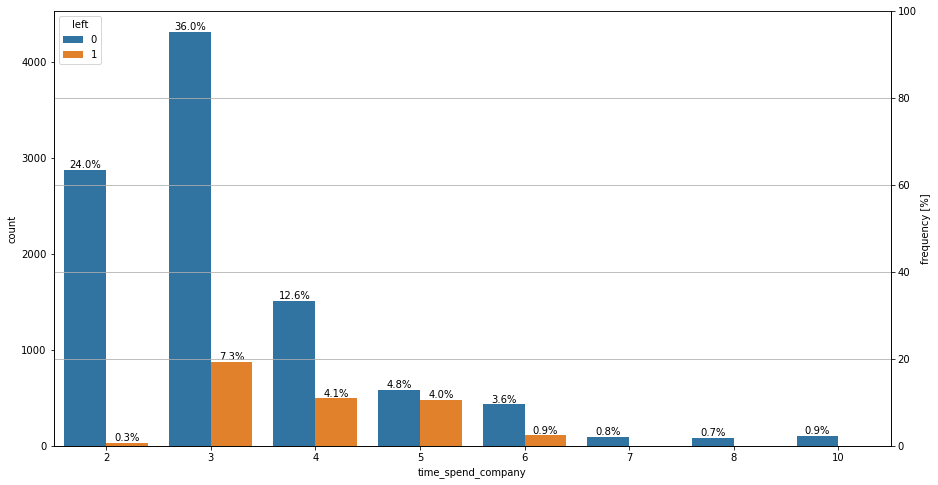

In [39]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='time_spend_company', hue='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') 
fig2.grid(None)
fig2.set_ylim(0,100)

### The effect of workload

(0.0, 100.0)

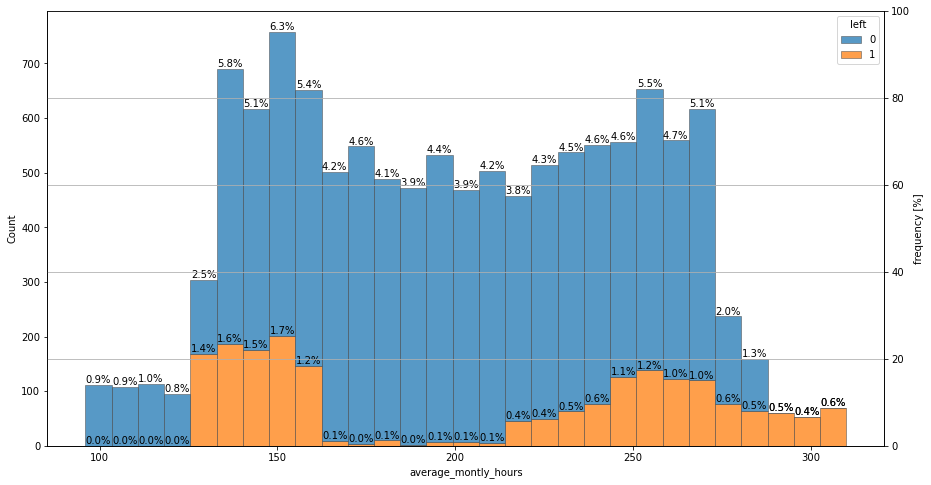

In [40]:
plt.figure(figsize=(15, 8))
fig = sns.histplot(
    df,
    x="average_montly_hours", hue="left",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5
)
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom') 
fig2.grid(None)
fig2.set_ylim(0,100)

Churn rate is zero below 125 hours and %100 over 290 hours.

### The effect of salary

(0.0, 100.0)

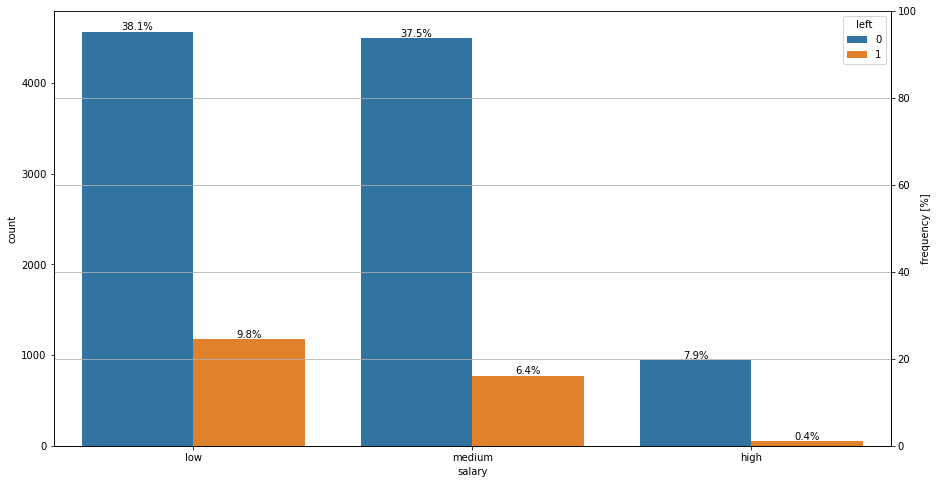

In [41]:
plt.figure(figsize=(15, 8))
fig = sns.countplot(data=df, x='salary', hue='left')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')
fig2.grid(None)
fig2.set_ylim(0,100)

As the salary decreases churn rate increases.

## 3. Data Pre-Processing

### Split Data as Train and Test Set

- In supervised models, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.
- For unsupervised learning we use all data for model keep in mind.

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

In [43]:
df_enc = df.copy()

In [44]:
X2 = df.copy()

In [45]:
df_enc.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [46]:
enc1 = OrdinalEncoder()
df_enc['departments'] = enc1.fit_transform(df_enc[['departments']])

enc2 = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df_enc['salary'] = enc2.fit_transform(df_enc[['salary']])

In [47]:
cat = X2.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [48]:
df_enc.tail(10)

satisfaction_level  last_evaluation  number_project  \
11990                0.49             0.49               4   
11991                0.60             0.53               2   
11992                0.62             0.85               3   
11993                0.64             0.50               4   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  left  \
11990                   212                   7              0     0   
11991                   235                   7              0     0   
11992                   237                   3              1     0   
11993                   253                  10              0     0   
11994                   193                  10              0     0   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  departments  salary  
11990                      0          6.0     1.0  
11991                      0          0.0     1.0  
11992                      0          0.0     1.0  
11993                      1          4.0     2.0  
11994                      1          4.0     2.0  
11995                      1          4.0     2.0  
11996                      1          4.0     2.0  
11997                      1          4.0     2.0  
11998                      1          5.0     2.0  
11999                      0          0.0     0.0

In [49]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.tail(10)

satisfaction_level  last_evaluation  number_project  \
11990                0.49             0.49               4   
11991                0.60             0.53               2   
11992                0.62             0.85               3   
11993                0.64             0.50               4   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  left  \
11990                   212                   7              0     0   
11991                   235                   7              0     0   
11992                   237                   3              1     0   
11993                   253                  10              0     0   
11994                   193                  10              0     0   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  departments  salary  
11990                      0          6.0     2.0  
11991                      0          0.0     2.0  
11992                      0          0.0     2.0  
11993                      1          4.0     0.0  
11994                      1          4.0     0.0  
11995                      1          4.0     0.0  
11996                      1          4.0     0.0  
11997                      1          4.0     0.0  
11998                      1          5.0     0.0  
11999                      0          0.0     1.0

In [50]:
df.tail(10)

satisfaction_level  last_evaluation  number_project  \
11990                0.49             0.49               4   
11991                0.60             0.53               2   
11992                0.62             0.85               3   
11993                0.64             0.50               4   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_montly_hours  time_spend_company  work_accident  left  \
11990                   212                   7              0     0   
11991                   235                   7              0     0   
11992                   237                   3              1     0   
11993                   253                  10              0     0   
11994                   193                  10              0     0   
11995                   259                  10              1     0   
11996                   266                  10              0     0   
11997                   185                  10              0     0   
11998                   172                  10              0     0   
11999                   180                   3              0     0   

       promotion_last_5years  departments  salary  
11990                      0  product_mng  medium  
11991                      0           IT  medium  
11992                      0           IT  medium  
11993                      1   management    high  
11994                      1   management    high  
11995                      1   management    high  
11996                      1   management    high  
11997                      1   management    high  
11998                      1    marketing    high  
11999                      0           IT     low

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [51]:
scaler = MinMaxScaler()

In [52]:
df_scaled = scaler.fit_transform(df_enc)

In [53]:
df_scaled = pd.DataFrame(df_scaled, columns=df_enc.columns)

In [54]:
df_scaled.sample(20)

satisfaction_level  last_evaluation  number_project  \
11689            0.582418         0.578125             0.2   
6861             0.439560         0.468750             0.2   
9086             0.593407         0.640625             0.2   
6694             0.857143         0.593750             0.6   
646              0.406593         0.218750             0.0   
3706             0.769231         0.531250             0.4   
6002             0.516484         0.625000             0.2   
8329             0.791209         0.406250             0.6   
1378             0.010989         0.812500             0.8   
3982             0.505495         0.359375             0.2   
5460             0.868132         0.843750             0.4   
7755             0.340659         0.765625             0.6   
9178             0.890110         0.296875             0.4   
9584             0.615385         0.640625             0.0   
4742             0.054945         0.734375             0.6   
6783             0.879121         0.468750             0.2   
7032             0.549451         0.718750             0.4   
8169             0.406593         0.296875             0.2   
9356             0.835165         0.359375             0.0   
6671             0.758242         0.562500             0.4   

       average_montly_hours  time_spend_company  work_accident  left  \
11689              0.696262               0.250            0.0   0.0   
6861               0.341121               0.125            0.0   0.0   
9086               0.373832               0.000            1.0   0.0   
6694               0.710280               0.000            0.0   0.0   
646                0.257009               0.125            0.0   1.0   
3706               0.803738               0.000            0.0   0.0   
6002               0.658879               0.125            0.0   0.0   
8329               0.490654               0.125            1.0   0.0   
1378               0.780374               0.250            0.0   1.0   
3982               0.696262               0.125            0.0   0.0   
5460               0.710280               0.000            0.0   0.0   
7755               0.014019               0.000            1.0   0.0   
9178               0.537383               0.125            0.0   0.0   
9584               0.710280               0.125            0.0   0.0   
4742               0.266355               0.375            1.0   0.0   
6783               0.822430               0.125            0.0   0.0   
7032               0.500000               0.250            1.0   0.0   
8169               0.200935               0.000            0.0   0.0   
9356               0.785047               0.000            0.0   0.0   
6671               0.757009               0.125            0.0   0.0   

       promotion_last_5years  departments  salary  
11689                    0.0     0.000000     0.0  
6861                     0.0     0.555556     0.5  
9086                     0.0     0.777778     0.0  
6694                     0.0     0.000000     0.0  
646                      0.0     1.000000     0.5  
3706                     0.0     0.888889     0.5  
6002                     0.0     1.000000     0.5  
8329                     0.0     0.777778     0.5  
1378                     0.0     0.555556     0.0  
3982                     0.0     0.777778     0.0  
5460                     0.0     0.888889     0.5  
7755                     0.0     0.888889     1.0  
9178                     0.0     0.222222     0.5  
9584                     0.0     0.888889     0.0  
4742                     0.0     0.777778     0.5  
6783                     0.0     0.111111     0.5  
7032                     0.0     0.777778     0.0  
8169                     0.0     0.777778     0.5  
9356                     0.0     0.888889     0.0  
6671                     0.0     1.000000     0.5

## 4. Cluster Analysis (Unsupervised)

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [55]:
X = df[['satisfaction_level', 'last_evaluation']]
X.head()

satisfaction_level  last_evaluation
0                0.38             0.53
1                0.80             0.86
2                0.11             0.88
3                0.72             0.87
4                0.37             0.52

In [56]:
# Hopkins Test

from pyclustertend import hopkins
hopkins(X, X.shape[0])

0.1631259426848713

Text(0.5, 1.0, 'elbow method')

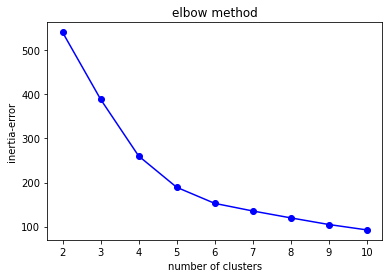

In [57]:
from sklearn.cluster import KMeans

ssd = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
    
plt.plot(range(2, 11), ssd, "bo-", markersize=6)
plt.xlabel("number of clusters")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [58]:
ssd

[540.757001211735,
 388.809111952425,
 260.1080026799745,
 189.15554368426476,
 152.65925680033652,
 135.42699718392913,
 119.76537452494031,
 104.72361298232644,
 92.47843246583288]

<AxesSubplot:>

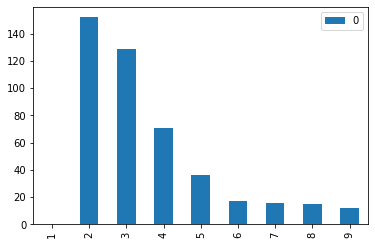

In [59]:
pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1).plot(kind='bar')

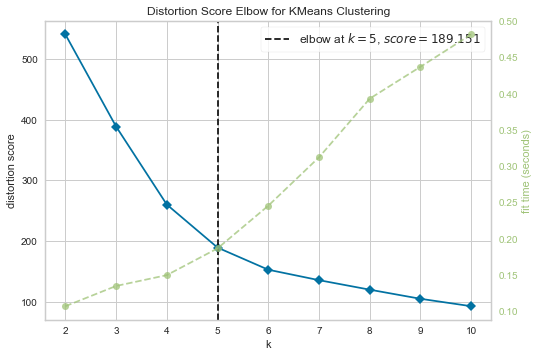

In [60]:
# yellowbrick

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,11))

visualizer.fit(X)        
visualizer.show();

In [61]:
from sklearn.metrics import silhouette_score

for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.42001137334194183
For n_clusters=3, the silhouette score is 0.3715207660618114
For n_clusters=4, the silhouette score is 0.4099975361822185
For n_clusters=5, the silhouette score is 0.4262632027136158
For n_clusters=6, the silhouette score is 0.4084975393823328
For n_clusters=7, the silhouette score is 0.3967955788747522
For n_clusters=8, the silhouette score is 0.3961597456795937
For n_clusters=9, the silhouette score is 0.39554147890417163
For n_clusters=10, the silhouette score is 0.39024160066682145


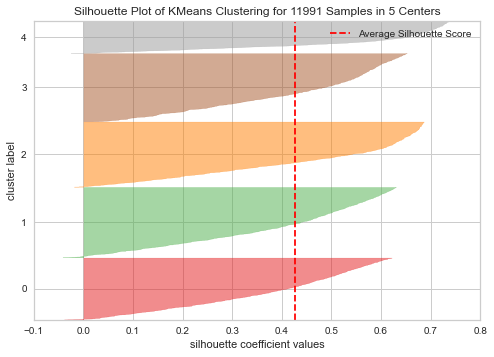

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.poof();

In [63]:
km_model = KMeans(n_clusters=5, random_state=42)
km_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [64]:
X['predicted_clusters'] = km_model.labels_

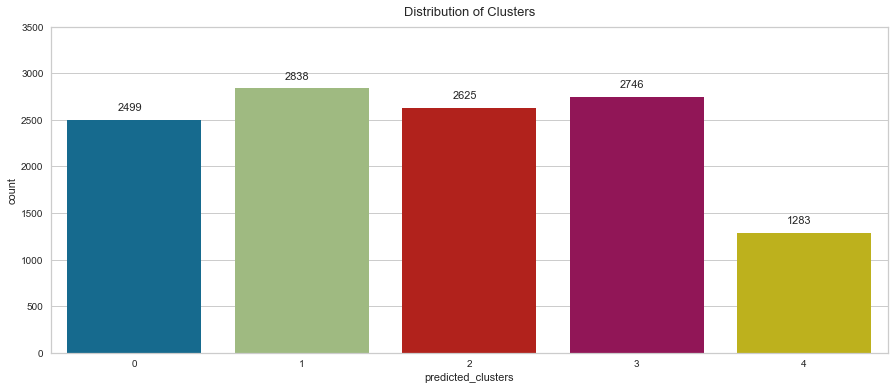

In [65]:
plt.figure(figsize = (15,6))

ax = sns.countplot(x='predicted_clusters', data=X)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+100), fontsize=11)
    
ax.set_title('Distribution of Clusters', size=13, pad=11) 
ax.set_ylim(0, 3500);

In [67]:
X.sample(10)

satisfaction_level  last_evaluation  predicted_clusters
1859                 0.43             0.57                   2
7562                 0.71             0.85                   0
305                  0.45             0.47                   2
1266                 0.45             0.53                   2
10844                0.51             0.86                   0
3531                 0.90             0.74                   3
1356                 0.10             0.79                   4
4474                 0.98             0.54                   1
3545                 0.80             0.70                   1
10034                0.92             0.65                   1

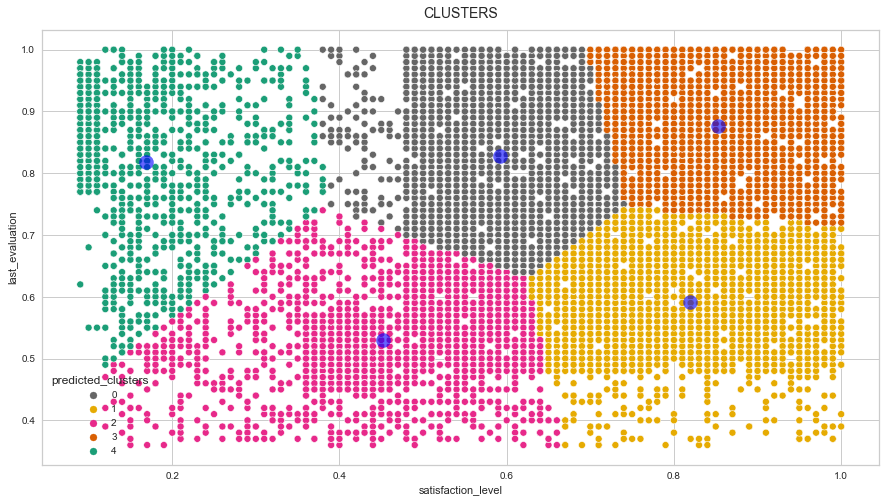

In [68]:
plt.figure(figsize = (15,8))

centers = km_model.cluster_centers_
sns.scatterplot(data=X, x='satisfaction_level', 
                y='last_evaluation', hue=X.predicted_clusters, palette='Dark2_r')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.6)
plt.title('CLUSTERS', size=14, pad=12);

## 5. Model Building (Supervised)

In [69]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#### Split Data as Train and Test Set

In [71]:
df = pd.get_dummies(df, columns=['departments', 'salary'], drop_first=True)

In [72]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   departments_RandD  departments_accounting  departments_hr  \
0                  0                       0               0   
1                  0                       0               0   
2                  0                       0               0   
3                  0                       0               0   
4                  0                       0               0   

   departments_management  departments_marketing  departments_product_mng  \
0                       0                      0                        0   
1                       0                      0                        0   
2                       0                      0                        0   
3                       0                      0                        0   
4                       0                      0                        0   

   departments_sales  departments_support  departments_technical  salary_low  \
0                  1                    0                      0           1   
1                  1                    0                      0           0   
2                  1                    0                      0           0   
3                  1                    0                      0           1   
4                  1                    0                      0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   last_evaluation          11991 non-null  float64
 2   number_project           11991 non-null  int64  
 3   average_montly_hours     11991 non-null  int64  
 4   time_spend_company       11991 non-null  int64  
 5   work_accident            11991 non-null  int64  
 6   left                     11991 non-null  int64  
 7   promotion_last_5years    11991 non-null  int64  
 8   departments_RandD        11991 non-null  uint8  
 9   departments_accounting   11991 non-null  uint8  
 10  departments_hr           11991 non-null  uint8  
 11  departments_management   11991 non-null  uint8  
 12  departments_marketing    11991 non-null  uint8  
 13  departments_product_mng  11991 non-null  uint8  
 14  departments_sales     

In [74]:
col_lst = df.columns
scaler = MinMaxScaler()
scaler_fitted = scaler.fit(df)
df_scaled = pd.DataFrame(scaler_fitted.transform(df), columns = col_lst)

In [75]:
df_scaled.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625             0.0              0.285047   
1            0.780220         0.781250             0.6              0.775701   
2            0.021978         0.812500             1.0              0.822430   
3            0.692308         0.796875             0.6              0.593458   
4            0.307692         0.250000             0.0              0.294393   

   time_spend_company  work_accident  left  promotion_last_5years  \
0               0.125            0.0   1.0                    0.0   
1               0.500            0.0   1.0                    0.0   
2               0.250            0.0   1.0                    0.0   
3               0.375            0.0   1.0                    0.0   
4               0.125            0.0   1.0                    0.0   

   departments_RandD  departments_accounting  departments_hr  \
0                0.0                     0.0             0.0   
1                0.0                     0.0             0.0   
2                0.0                     0.0             0.0   
3                0.0                     0.0             0.0   
4                0.0                     0.0             0.0   

   departments_management  departments_marketing  departments_product_mng  \
0                     0.0                    0.0                      0.0   
1                     0.0                    0.0                      0.0   
2                     0.0                    0.0                      0.0   
3                     0.0                    0.0                      0.0   
4                     0.0                    0.0                      0.0   

   departments_sales  departments_support  departments_technical  salary_low  \
0                1.0                  0.0                    0.0         1.0   
1                1.0                  0.0                    0.0         0.0   
2                1.0                  0.0                    0.0         0.0   
3                1.0                  0.0                    0.0         1.0   
4                1.0                  0.0                    0.0         1.0   

   salary_medium  
0            0.0  
1            1.0  
2            1.0  
3            0.0  
4            0.0

In [76]:
X = df.drop('left', axis=1)
y = df['left']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)


In [78]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8393, 18)
Train target shape   :  (8393,)
Test features shape  :  (3598, 18)
Test target shape    :  (3598,)


### #Gradient Boosting Classifier

#### Model Building

In [79]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=.01, max_depth=8).fit(X_train, y_train)


In [80]:
gbc_model.score(X_test, y_test)

0.9836020011117287

In [81]:
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

Test_Set
[[2989   12]
 [  47  550]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.98      0.92      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6989   10]
 [  90 1304]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.94      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [82]:
# CV

model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.981651
test_precision    0.964077
test_recall       0.923921
test_f1           0.943475
test_roc_auc      0.984619
dtype: float64

In [83]:
# Gridsearch

param_grid = {'max_depth': [5, 6, 7], 'subsample': [0.5, 1],'max_features' : [5,6], 
              'n_estimators': [225, 250, 500], 'max_depth': [6, 7], 
              'learning_rate': [0.1,0.05,0.01]} 

%time gbc_grid_model = GridSearchCV(model, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', gbc_grid_model.best_params_)
print('\n', gbc_grid_model.best_estimator_)
print('\n', 'Best Score :', gbc_grid_model.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.7min finished


Wall time: 4min 46s

 {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 6, 'n_estimators': 500, 'subsample': 0.5}

 GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=6,
                           n_estimators=500, random_state=42, subsample=0.5)

 Best Score : 0.952097405815343


In [84]:
eval_metric(gbc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2991   10]
 [  48  549]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.98      0.92      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6988   11]
 [  83 1311]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.99      0.94      0.97      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [85]:
gbc_model =  GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=6,
                                        n_estimators=250, random_state=42, subsample=1).fit(X_train, y_train)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

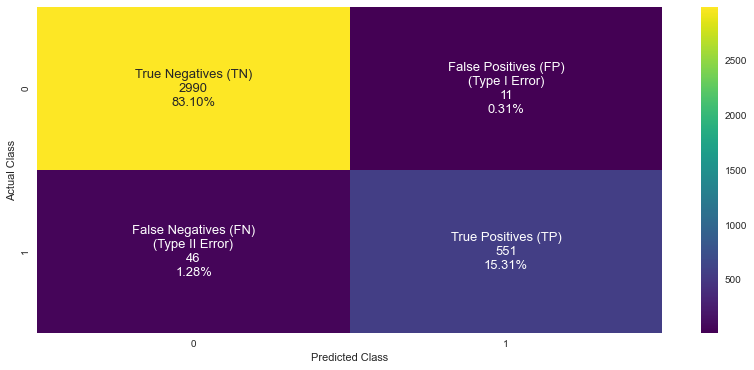

In [86]:
plt.figure(figsize=(14,6))

y_pred = gbc_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

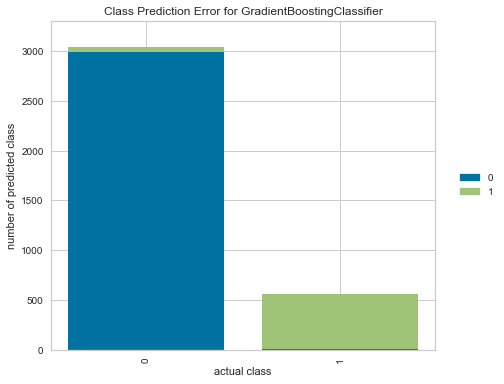

In [87]:
visualizer = ClassPredictionError(gbc_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

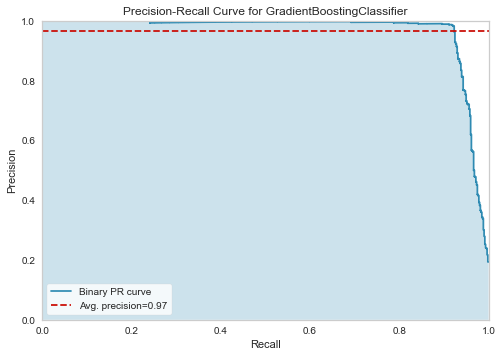

In [88]:
viz = PrecisionRecallCurve(gbc_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [89]:
y_pred_proba = gbc_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9653030284046951

#### Scores

In [90]:
y_pred = gbc_model.predict(X_test)
y_pred_proba = gbc_model.predict_proba(X_test)

gbc_accuracy = gbc_model.score(X_test, y_test) # accuracy_score(y_test, y_pred)
gbc_precision = precision_score(y_test, y_pred)
gbc_recall = recall_score(y_test, y_pred)
gbc_f1 = f1_score(y_test, y_pred)
gbc_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

In [91]:
gbc_model_final = GradientBoostingClassifier(learning_rate=0.05, max_depth=7, max_features=6,
                                             n_estimators=250, random_state=42, subsample=1).fit(X_train, y_train)

In [92]:
gbc_tuned = gbc_model_final.fit(X_train, y_train)

In [93]:
# Prediction
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 7,
        'average_montly_hours': 12,
        'time_spend_company': 0.5,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [94]:
x = pd.get_dummies(x)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  departments_IT  \
0                 0.5              0                      0               1   

   salary_low  
0           1

In [95]:
col_lst = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
           'work_accident', 'promotion_last_5years', 'department_RandD', 'department_accounting', 'department_hr', 
           'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 
           'department_support', 'department_technical', 'salary_low', 'salary_medium']

In [96]:
x = x.reindex(columns=col_lst, fill_value=0)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  department_RandD  \
0                 0.5              0                      0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 0   

   department_support  department_technical  salary_low  salary_medium  
0                   0                     0           1              0

In [97]:
scaler = MinMaxScaler()
scaler_fitted = scaler.fit(x)

In [98]:
y_pred = gbc_model_final.predict(x)
y_pred

array([0], dtype=int64)

### #KNeighbors Classifier

#### Model Building

In [99]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [100]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2875  126]
 [  72  525]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3001
           1       0.81      0.88      0.84       597

    accuracy                           0.94      3598
   macro avg       0.89      0.92      0.90      3598
weighted avg       0.95      0.94      0.95      3598


Train_Set
[[6784  215]
 [ 119 1275]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      6999
           1       0.86      0.91      0.88      1394

    accuracy                           0.96      8393
   macro avg       0.92      0.94      0.93      8393
weighted avg       0.96      0.96      0.96      8393



In [101]:

# CV

model =  KNeighborsClassifier()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.944596
test_precision    0.801157
test_recall       0.888088
test_f1           0.841994
test_roc_auc      0.956230
dtype: float64

In [102]:
# Elbow Method for Choosing Best K Values

test_error_rates = []

for k in range(1,30):
    
    model.set_params(n_neighbors=k)
    model.fit(X_train,y_train) 
   
    y_pred_test = model.predict(X_test)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

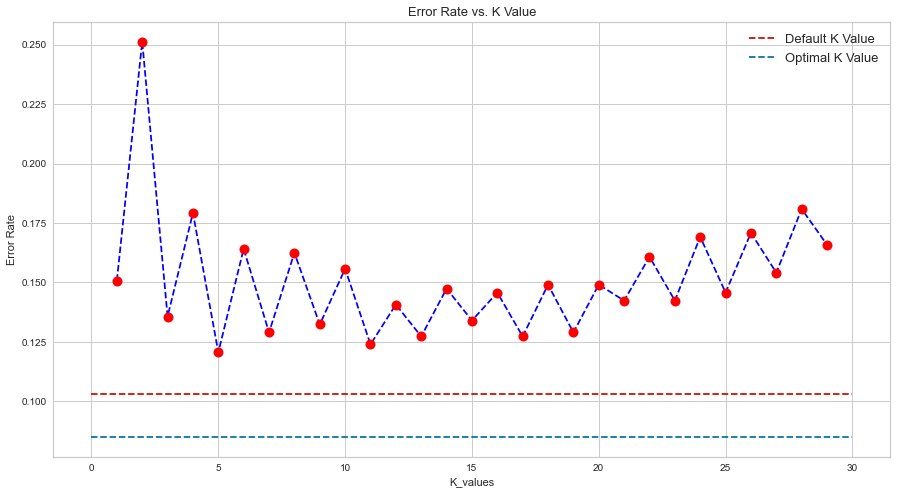

In [103]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', size=13)
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.103, xmin = 0, xmax = 30, colors= 'r', linestyles='--', label='Default K Value')
plt.hlines(y=0.085, xmin = 0, xmax = 30, colors= 'b', linestyles='--', label='Optimal K Value')
plt.legend(prop={'size':13});

In [104]:
# Modeling with optimal K 

knn_model = KNeighborsClassifier(n_neighbors=17)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [105]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2880  121]
 [  76  521]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3001
           1       0.81      0.87      0.84       597

    accuracy                           0.95      3598
   macro avg       0.89      0.92      0.90      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6701  298]
 [ 141 1253]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6999
           1       0.81      0.90      0.85      1394

    accuracy                           0.95      8393
   macro avg       0.89      0.93      0.91      8393
weighted avg       0.95      0.95      0.95      8393



In [106]:
# Gridsearch

model = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1,25), 'p': [1,2], 'weights': ['uniform', 'distance'],
              'leaf_size': [15, 30, 40]}

knn_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='f1', n_jobs=-1)

%time knn_grid_model.fit(X_train,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_estimator_)
print('\n', 'Best Score :', knn_grid_model.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2865 out of 2880 | elapsed:   51.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   51.2s finished


Wall time: 51.3 s

 {'leaf_size': 15, 'n_neighbors': 22, 'p': 1, 'weights': 'distance'}

 KNeighborsClassifier(leaf_size=15, n_neighbors=22, p=1, weights='distance')

 Best Score : 0.8517833912485262


In [107]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2894  107]
 [  86  511]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3001
           1       0.83      0.86      0.84       597

    accuracy                           0.95      3598
   macro avg       0.90      0.91      0.90      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [108]:
knn_model = KNeighborsClassifier(leaf_size=15, n_neighbors=22, p=1, weights='distance').fit(X_train, y_train)


#### Evaluating Model Performance

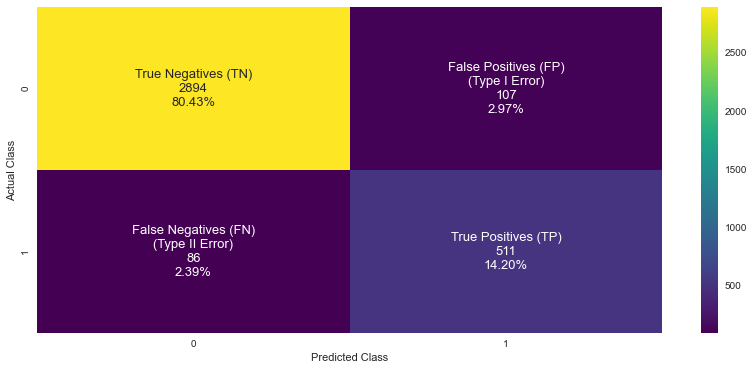

In [109]:
plt.figure(figsize=(14,6))

y_pred = knn_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

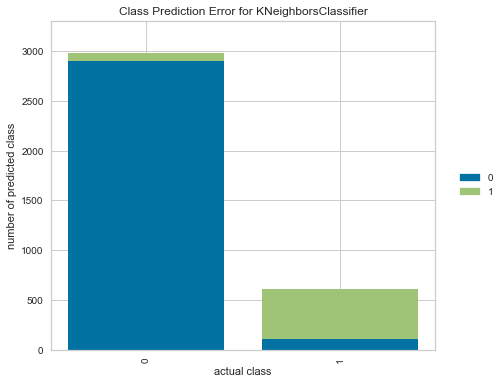

In [110]:
visualizer = ClassPredictionError(knn_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

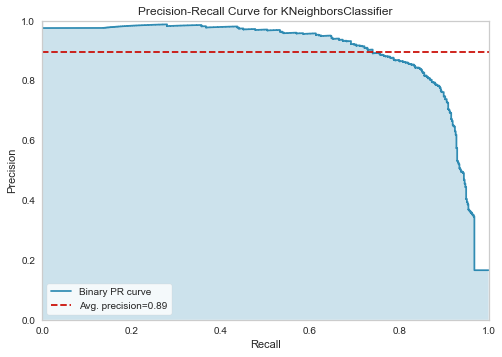

In [111]:
viz = PrecisionRecallCurve(knn_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [112]:
y_pred_proba = knn_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.8945167851834956

#### Scores

In [113]:
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

knn_accuracy = knn_model.score(X_test, y_test) 
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

In [114]:
knn_model_final = KNeighborsClassifier(leaf_size=15, n_neighbors=4, p=1)

In [115]:
knn_tuned = knn_model_final.fit(X_train, y_train)

In [116]:
# Prediction
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 7,
        'average_montly_hours': 12,
        'time_spend_company': 0.5,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [117]:
x = pd.get_dummies(x)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  departments_IT  \
0                 0.5              0                      0               1   

   salary_low  
0           1

In [118]:
x = x.reindex(columns=col_lst, fill_value=0)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  department_RandD  \
0                 0.5              0                      0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 0   

   department_support  department_technical  salary_low  salary_medium  
0                   0                     0           1              0

In [119]:
scaler = MinMaxScaler()
scaler_fitted = scaler.fit(x)

In [120]:
y_pred = knn_model_final.predict(x)
y_pred

array([0], dtype=int64)

### #Random Forest Classifier

#### Model Building

In [121]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [122]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2995    6]
 [  57  540]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.90      0.94       597

    accuracy                           0.98      3598
   macro avg       0.99      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [123]:
# CV

model = RandomForestClassifier()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.982247
test_precision    0.983107
test_recall       0.908864
test_f1           0.944336
test_roc_auc      0.980220
dtype: float64

In [124]:
# Gridsearch

param_grid = {'n_estimators':[64, 100, 128, 200],
              'max_features':[3, 5, 'auto'],
              'max_depth':[4, 7, 9],
              'min_samples_split':[2, 5, 8],
              'class_weight': [None, 'balanced']}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='f1', n_jobs=-1)

%time rf_grid_model.fit(X_train,y_train)

print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  6.2min finished


Wall time: 6min 13s

 {'class_weight': None, 'max_depth': 9, 'max_features': 5, 'min_samples_split': 8, 'n_estimators': 64}

 RandomForestClassifier(max_depth=9, max_features=5, min_samples_split=8,
                       n_estimators=64)

 Best Score : 0.9465690025177688


In [125]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2993    8]
 [  52  545]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.91      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6982   17]
 [ 110 1284]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6999
           1       0.99      0.92      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.99      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [126]:
rf_model = RandomForestClassifier(max_depth=9, max_features=5,
                                  min_samples_split=2, n_estimators=64,
                                  random_state=42).fit(X_train, y_train)

#### Evaluating Model Performance

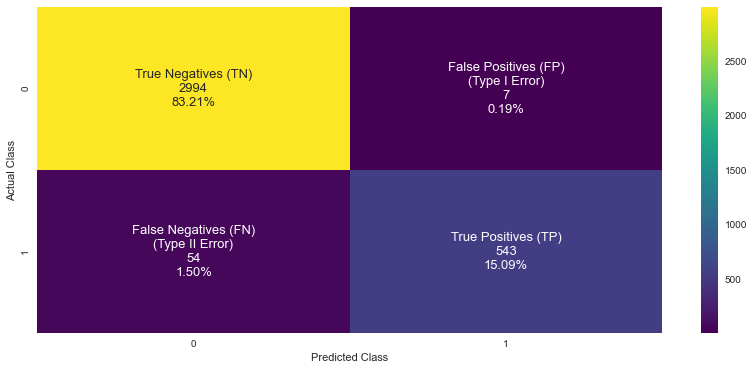

In [127]:
plt.figure(figsize=(14,6))

y_pred = rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

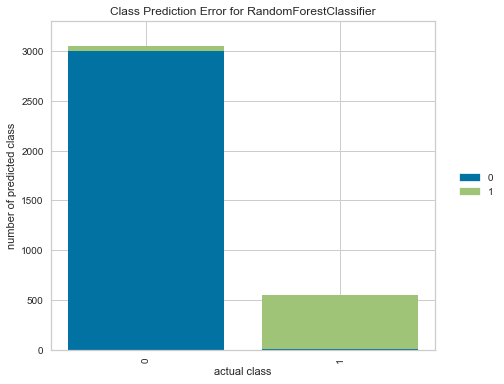

In [128]:
visualizer = ClassPredictionError(rf_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

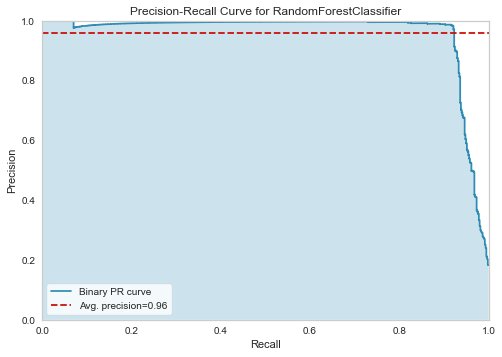

In [129]:
viz = PrecisionRecallCurve(rf_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [130]:
y_pred_proba = rf_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9578839572201597

#### Scores

In [131]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

rf_accuracy = rf_model.score(X_test, y_test) # accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

#### Prediction

In [132]:
rf_model_final = RandomForestClassifier(max_depth=9, max_features=5,
                                  min_samples_split=2, n_estimators=64,
                                  random_state=42).fit(X_train, y_train)

In [133]:
rf_tuned = rf_model_final.fit(X_train, y_train)

In [134]:
# Prediction 
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 7,
        'average_montly_hours': 12,
        'time_spend_company': 0.5,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [135]:
x = pd.get_dummies(x)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  departments_IT  \
0                 0.5              0                      0               1   

   salary_low  
0           1

In [136]:
x = x.reindex(columns=col_lst, fill_value=0)
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                    12   

   time_spend_company  work_accident  promotion_last_5years  department_RandD  \
0                 0.5              0                      0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 0   

   department_support  department_technical  salary_low  salary_medium  
0                   0                     0           1              0

In [137]:
scaler = MinMaxScaler()
scaler_fitted = scaler.fit(x)

In [138]:
y_pred = rf_model_final.predict(x)
y_pred

array([1], dtype=int64)

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [139]:
import pickle

In [140]:
gradient_boosting_classifier = pickle.dump(gbc_tuned, open('gradient_boosting_model', 'wb'))

In [141]:
kneighbors_classifier = pickle.dump(knn_tuned, open('kneighbors_model', 'wb'))

In [142]:
random_forest_classifier = pickle.dump(rf_tuned, open('random_forest_model', 'wb'))

### Save and Export Variables as .pkl

In [143]:
col_lst = X.columns
scaler_fitted = scaler.fit(df_scaled[X.columns])
scaler_deploy = pickle.dump(scaler_fitted, open('scaler.sav', 'wb'))